<img src="logosimbolo1.gif" width="180" height="180" align="left"/>

<img src="logo_leam.png" width="160" height="460" align="right"/>

<font color='magenta' size=6 align='center'><p style='text-align: center;'>**Análisis y Tratamiento de Datos en Química**\
<font color=navy size=5><p style='text-align: center;'>**Enrique Mejía Ospino, emejia@uis.edu.co**\
<font color=navy size=5>         **Universidad Industrial de Santander**
---

<font color=magenta size=6>**Visualización: Gráficas Científicas**

---

<font color='#050505' size=5><p style='text-align: justify;'>**En esta parte del curso revisaremos como hacer gráficas científicas de alta calidad utilizando los modulos o librerías más importantes en python para este proposito.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

**<font color=blue size=4>Empezaremos utilizando el modulo más popular en visualización; `Matplotlib`.  Esta librería es básicamente un emulador de Matlab en lo que tiene que ver con gráficación, por ello el formato  y sus funciones son muy similares.** 

In [3]:
data = pd.read_excel('https://github.com/emejiao/Mass_Spectra3/blob/master/Z_Potentials_GSO.xlsx?raw=true', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-149.0,-149.0,-148.0,-149.0,-148.0,-147.0,-148.0,-150.0,-147.0,-150.0,-150.0,-150.0
1,-146.0,-145.0,-144.0,-146.0,-145.0,-144.0,-145.0,-146.0,-143.0,-146.0,-146.0,-146.0
2,-142.0,-142.0,-141.0,-142.0,-141.0,-140.0,-141.0,-143.0,-140.0,-143.0,-142.0,-143.0
3,-138.0,-138.0,-137.0,-139.0,-138.0,-136.0,-138.0,-139.0,-136.0,-139.0,-139.0,-139.0
4,-135.0,-135.0,-134.0,-135.0,-134.0,-133.0,-134.0,-136.0,-132.0,-136.0,-135.0,-136.0


In [4]:
Z_Potential = data[0:82]
Intensity = data[84:166]
Intensity.shape, Z_Potential.shape

((82, 12), (82, 12))

In [5]:
Intensity[1]

84     0.0
85     0.0
86     0.0
87     0.0
88     0.0
      ... 
161    0.0
162    0.0
163    0.0
164    0.0
165    0.0
Name: 1, Length: 82, dtype: float64

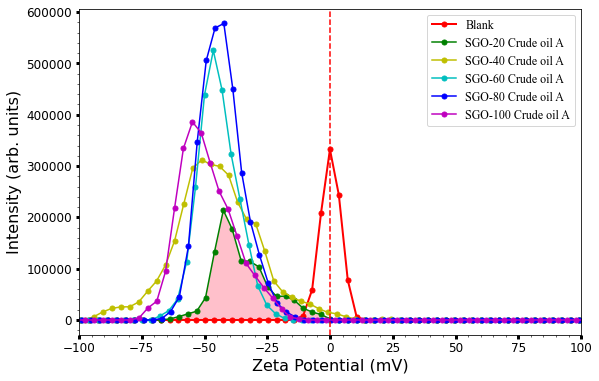

In [6]:
fig, ax = plt.subplots(figsize=(9,6))
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
plt.rcParams["font.family"] = 'Times New Roman'
ax.plot(Z_Potential[0], Intensity[0], 'r-o', label='Blank', markersize=5, lw=2)
ax.plot(Z_Potential[1], Intensity[1], 'g-o', label='SGO-20 Crude oil A', markersize=5)
plt.fill(Z_Potential[1], Intensity[1], 'pink')
ax.plot(Z_Potential[2], Intensity[2], 'y-o', label='SGO-40 Crude oil A', markersize=5)
ax.plot(Z_Potential[3], Intensity[3], 'c-o', label='SGO-60 Crude oil A', markersize=5)
ax.plot(Z_Potential[4], Intensity[4], 'b-o', label='SGO-80 Crude oil A', markersize=5)
ax.plot(Z_Potential[5], Intensity[5], 'm-o', label='SGO-100 Crude oil A', markersize=5)
ax.legend(loc='best', fontsize=12)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(20000))
ax.tick_params(axis='both', labelsize=12, width=3)
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_xlim(-100, 100)
plt.axvline(x = 0, color = 'red', linestyle='--', label='Average')
#ax.set_ylim(500, 5000)
ax.set_xlabel('Zeta Potential (mV)',  fontsize=16)
ax.set_ylabel('Intensity (arb. units)', fontsize=16)
fig.savefig("Z_Pot.tif", dpi=200)
plt.show()

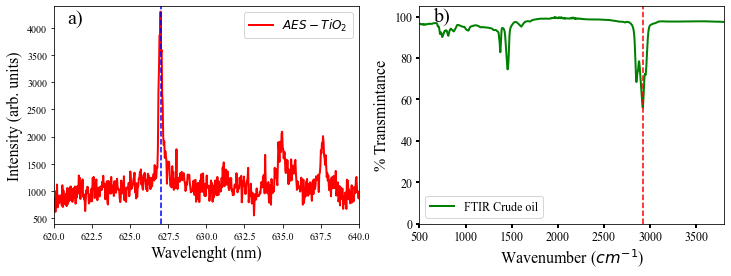

In [7]:
tio = np.loadtxt('https://github.com/emejiao/Mass_Spectra3/raw/master/tio88_1.txt')
ir = np.loadtxt('https://github.com/emejiao/Mass_Spectra3/raw/master/cinco.CSV', delimiter=',')
fig, ax = plt.subplots(1,2, figsize=(12,4))
lo = tio[:, 0]
In = tio[:, 2]
wn = ir[:, 0]
t = ir[:,1]
#%matplotlib jupyter notebook
#Gráfica uno
plt.rcParams["font.family"] = 'Times New Roman'
ax[0].plot(lo, In, 'r', label='$AES-TiO_2$', markersize=5, lw=2)
ax[0].legend(loc='best', fontsize=12)
ax[0].set_xlim(620, 640)
ax[0].set_ylim(400, np.max(In)+100)
ax[0].axvline(x = lo[np.where(In==np.max(In))], color = 'blue', linestyle='--') # Pone una línea punteada y azul en el máximo
ax[0].text(np.min(lo)+10, np.max(In)-200, 'a)', fontsize=20, color="black")
ax[0].set_xlabel('Wavelenght (nm)',  fontsize=16)
ax[0].set_ylabel('Intensity (arb. units)', fontsize=16)

# Gráfica dos
ax[1].plot(wn, t, 'g', label='FTIR Crude oil', lw=2)
ax[1].tick_params(labelsize=12, labelcolor='k', width=2)
ax[1].legend(loc='best', fontsize=12) # puede usar otro ubicación poniendo un número 0 ('best'), 1, 2, ...
ax[1].set_xlim(500, 3800)
ax[1].set_ylim(0, 105)
ax[1].axvline(x = wn[np.where(t==np.min(t[10:]))], color = 'red', linestyle='--')
ax[1].text(np.min(wn)+ 250, np.max(t)-2, 'b)', fontsize=20, color="black") # 
ax[1].set_xlabel('Wavenumber ($cm^{-1}$)',  fontsize=16)
ax[1].set_ylabel('% Transmintance', fontsize=16)

fig.savefig("Two_spectra.jpg", dpi=200)
plt.show()

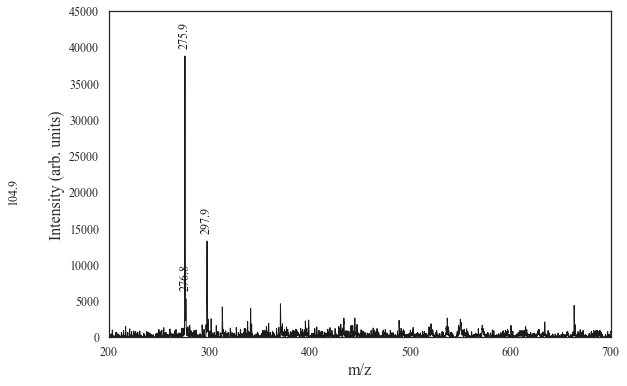

In [11]:
ms1 = np.loadtxt('pr8eva1.txt')
ms2 = np.loadtxt('110113 MB.xy')
from scipy.signal import find_peaks
fig, ax = plt.subplots(figsize=(9,6))
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
plt.rcParams["font.family"] = 'Times New Roman'
ax.plot(ms2[:,0], ms2[:,1], 'k', label='Metronidazol', markersize=5, lw=1)
#ax.legend(loc='best', fontsize=12)
peaks, _ = find_peaks(ms2[:,1], height=5000)
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(2000))
ax.tick_params(axis='both', labelsize=12, width=3)
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_xlim(200, 700)
plt.axvline(x = 0, color = 'red', linestyle='--', label='Average')
ax.set_ylim(0, 45000)
for i, (mz, In)  in enumerate(zip(ms2[peaks][:,0], ms2[peaks][:,1])):
    ax.text(mz, In+1500, round(mz, 1), rotation='vertical', size=12, color="k", horizontalalignment='center')
ax.set_xlabel('m/z',  fontsize=16)
ax.set_ylabel('Intensity (arb. units)', fontsize=16)
fig.savefig("Metro2.jpg", dpi=140)
plt.show()

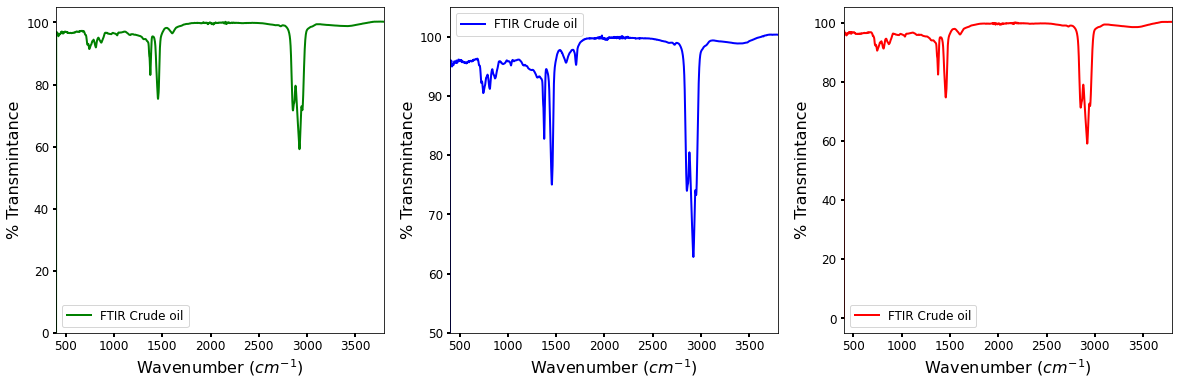

In [3]:
#tio = np.loadtxt('https://github.com/emejiao/Mass_Spectra3/raw/master/tio88_1.txt')
ir3 = np.loadtxt('./Datos/FTIR_C1.CSV', delimiter=',')
ir2 = np.loadtxt('./Datos/FTIR_C2.CSV', delimiter=',')
ir1 = np.loadtxt('./Datos/FTIR_C3.CSV', delimiter=',')

fig, ax = plt.subplots(1,3, figsize=(20,6))

#%matplotlib jupyter notebook
#Gráfica uno
ax[0].plot(ir1[:,0], ir1[:,1], 'g', label='FTIR Crude oil', lw=2)
ax[0].tick_params(labelsize=12, labelcolor='k', width=2)
ax[0].legend(loc='best', fontsize=12) # puede usar otro ubicación poniendo un número 0 ('best'), 1, 2, ...
ax[0].set_xlim(400, 3800)
ax[0].set_ylim(0, 105)
ax[0].set_xlabel('Wavenumber ($cm^{-1}$)',  fontsize=16)
ax[0].set_ylabel('% Transmintance', fontsize=16)

# Gráfica dos
ax[1].plot(ir2[:,0], ir2[:,1], 'b', label='FTIR Crude oil', lw=2)
ax[1].tick_params(labelsize=12, labelcolor='k', width=2)
ax[1].legend(loc='best', fontsize=12) # puede usar otro ubicación poniendo un número 0 ('best'), 1, 2, ...
ax[1].set_xlim(400, 3800)
ax[1].set_ylim(50, 105)
#ax[1].axvline(x = wn[np.where(t==np.min(t[10:]))], color = 'red', linestyle='--')
#ax[1].text(np.min(wn)+ 250, np.max(t)-2, 'b)', fontsize=20, color="black") # 
ax[1].set_xlabel('Wavenumber ($cm^{-1}$)',  fontsize=16)
ax[1].set_ylabel('% Transmintance', fontsize=16)

ax[2].plot(ir3[:,0], ir3[:,1], 'r', label='FTIR Crude oil', lw=2)
ax[2].tick_params(labelsize=12, labelcolor='k', width=2)
ax[2].legend(loc='best', fontsize=12) # puede usar otro ubicación poniendo un número 0 ('best'), 1, 2, ...
ax[2].set_xlim(400, 3800)
#ax[2].set_ylim(0, 105)
#ax[1].axvline(x = wn[np.where(t==np.min(t[10:]))], color = 'red', linestyle='--')
#ax[1].text(np.min(wn)+ 250, np.max(t)-2, 'b)', fontsize=20, color="black") # 
ax[2].set_xlabel('Wavenumber ($cm^{-1}$)',  fontsize=16)
ax[2].set_ylabel('% Transmintance', fontsize=16)

fig.savefig("Two_spectra.jpg", dpi=200)
plt.show()

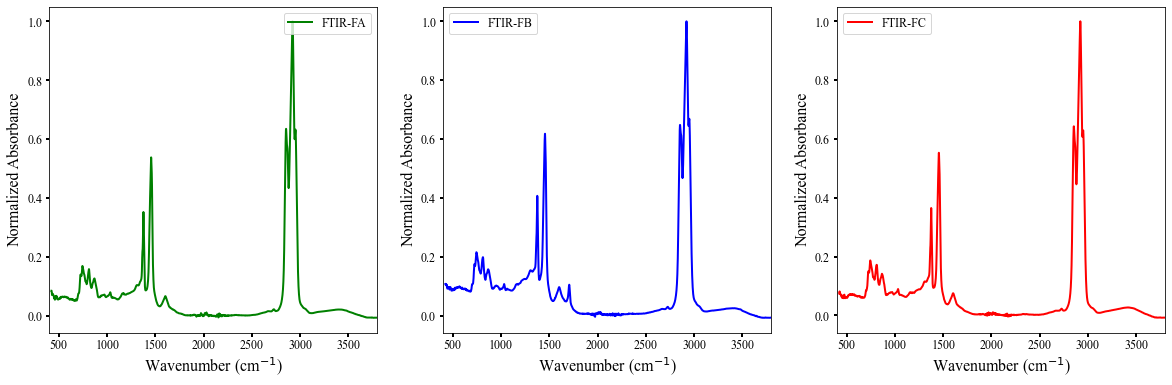

In [6]:
ir3 = np.loadtxt('./Datos/FTIR_C1.CSV', delimiter=',')
ir2 = np.loadtxt('./Datos/FTIR_C2.CSV', delimiter=',')
ir1 = np.loadtxt('./Datos/FTIR_C3.CSV', delimiter=',')
l=len(ir1[:,1])
wn=ir1[:,0][50:l]; I1=2-np.log10(ir1[:,1][50:l]); I2=2-np.log10(ir2[:,1][50:l]); I3=2-np.log10(ir3[:,1][50:l])
I1=I1/(np.max(I1))
fig, ax = plt.subplots(1,3, figsize=(20,6))


#Gráfica uno
ax[0].plot(wn, I1, 'g', label='FTIR-FA', lw=2)
ax[0].tick_params(labelsize=12, labelcolor='k', width=2)
ax[0].legend(loc=1, fontsize=12) # puede usar otro ubicación poniendo un número 0 ('best'), 1, 2, ...
ax[0].set_xlim(400, 3800)
#ax[0].set_ylim(0, 105)
#ax[1].axvline(x = wn[np.where(t==np.min(t[10:]))], color = 'red', linestyle='--')
#ax[1].text(np.min(wn)+ 250, np.max(t)-2, 'b)', fontsize=20, color="black") # 
ax[0].set_xlabel('Wavenumber (cm$^{-1}$)',  fontsize=16)
ax[0].set_ylabel('Normalized Absorbance', fontsize=16)

# Gráfica dos
ax[1].plot(wn, I2/(np.max(I2)), 'b', label='FTIR-FB', lw=2)
ax[1].tick_params(labelsize=12, labelcolor='k', width=2)
ax[1].legend(loc='best', fontsize=12) # puede usar otro ubicación poniendo un número 0 ('best'), 1, 2, ...
ax[1].set_xlim(400, 3800)
#ax[1].set_ylim(0, 105)
ax[1].set_xlabel('Wavenumber (cm$^{-1}$)',  fontsize=16)
ax[1].set_ylabel('Normalized Absorbance', fontsize=16)

ax[2].plot(wn, I3/(np.max(I3)), 'r', label='FTIR-FC', lw=2)
ax[2].tick_params(labelsize=12, labelcolor='k', width=2)
ax[2].legend(loc='best', fontsize=12) # puede usar otro ubicación poniendo un número 0 ('best'), 1, 2, ...
ax[2].set_xlim(400, 3800)
#ax[2].set_ylim(0, 105)
#ax[1].axvline(x = wn[np.where(t==np.min(t[10:]))], color = 'red', linestyle='--')
#ax[1].text(np.min(wn)+ 250, np.max(t)-2, 'b)', fontsize=20, color="black") # 
ax[2].set_xlabel('Wavenumber (cm$^{-1}$)',  fontsize=16)
ax[2].set_ylabel('Normalized Absorbance', fontsize=16)

fig.savefig("Two_spectra.jpg", dpi=200)
plt.show()

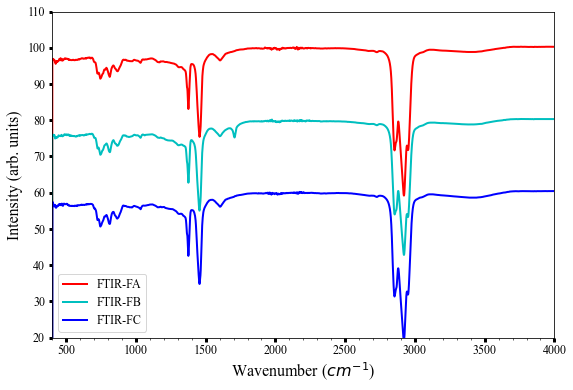

In [7]:
fig, ax = plt.subplots(figsize=(9,6))
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
plt.rcParams["font.family"] = 'Times New Roman'
ax.plot(ir1[:,0], ir1[:,1], 'r', label='FTIR-FA', lw=2)
ax.plot(ir2[:,0], ir2[:,1]-20, 'c', label='FTIR-FB', lw=2 )
ax.plot(ir3[:,0], ir3[:,1]-40, 'b', label='FTIR-FC', lw=2)
ax.legend(loc='best', fontsize=12)
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.tick_params(axis='both', labelsize=12, width=3)
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_xlim(400, 4000)
ax.set_ylim(20, 110)
#plt.axvline(x = 0, color = 'red', linestyle='--', label='Average')
#ax.set_ylim(500, 5000)
ax.set_xlabel('Wavenumber ($cm^{-1}$)',  fontsize=16)
ax.set_ylabel('Intensity (arb. units)', fontsize=16)
fig.savefig("ftir-DI.jpg", dpi=200)
plt.show()

In [57]:
matriz_IR = np.zeros([len(I1), 4])
matriz_IR[:, 0] = wn
matriz_IR[:, 1] = I1
matriz_IR[:, 2] = I2
matriz_IR[:, 3] = I3

print(matriz_IR[:,1 :4]) # Aquí vamos a inspeccionar las columnas del la posición 1-4, la posición 0 es wn

[[ 0.08654413  0.0216647   0.01689161]
 [ 0.0865633   0.0215306   0.01722451]
 [ 0.08586802  0.02145115  0.01755513]
 ...
 [-0.00495059 -0.00138752 -0.0019547 ]
 [-0.00496582 -0.00138493 -0.00195816]
 [-0.00496392 -0.00138406 -0.00195902]]


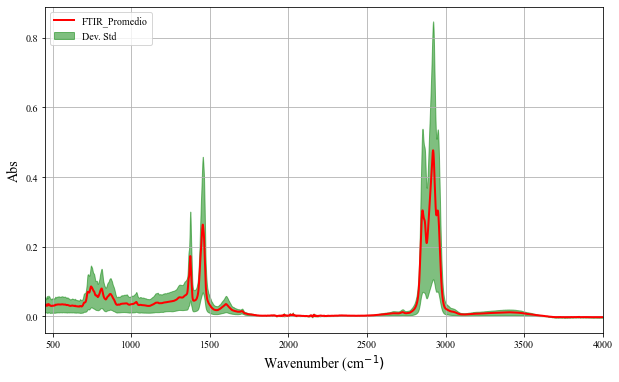

In [83]:
ir_mean = np.mean((matriz_IR[:,1 :4]), axis=1) # Obtenemos el promedio de los tres espectros 
ir_std = np.std((matriz_IR[:,1 :4]), axis=1) # La desviación estándard de los tres espectros

plt.figure(figsize=(10,6))
plt.rcParams["font.family"] = 'Times New Roman'
plt.plot(wn, ir_mean, 'r-', lw=2, label='FTIR_Promedio')
plt.fill_between(wn, ir_mean - ir_std, ir_mean + ir_std, alpha=0.5, color='g', label='Dev. Std')
plt.ylabel('Abs', fontsize=14)
plt.xlabel('Wavenumber (cm$^{-1})$', fontsize=14)
plt.legend(loc = 2)
plt.xlim(450, 4000)
plt.grid()
#plt.savefig('fig1.jpg', dpi=120)

**<font color=red size=4>Mostramos ahora como visualizar graáficas de barras usando `Matplotlib`. Podrá encontra muchos ejemplos de todo tipo de gráficas en la [pagina web de Matplotlib](https://matplotlib.org/stable/index.html)** 

In [92]:
#Aquí leemos los datos de archivo excel ubicado como se indica aabajo

data_bar = pd.read_excel('https://github.com/emejiao/Mass_Spectra3/raw/master/AND1(APPI).xls',sheet_name='Combined R. Abundances',index_col='Class')
data_bar

,R. Abundance,A.M.W. average,A.W. average C#,A.W. average DBE,A.W. average H/C
Class,,,,,
HC,41.500177,569.347057,41.971931,13.009065,1.542934
S1,6.997977,570.003806,39.894031,13.398517,1.558822
O1 -R,6.127822,593.205207,42.992651,15.658656,1.427401
N1 -R,3.699787,595.778990,43.458249,16.179416,1.371524
N2 O2 S1 -R,0.533891,593.303865,37.927453,17.318688,1.927552
Total,58.859654,573.978409,41.915051,13.672138,1.528435


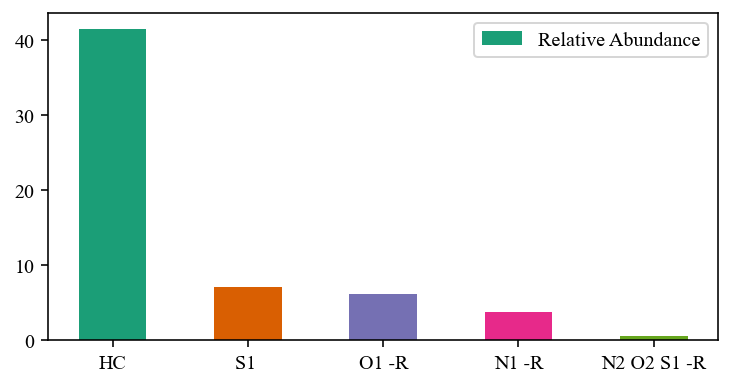

In [91]:
plt.figure(figsize=(6, 3), dpi=144)
plt.rcParams["font.family"] = 'Times New Roman'
colors = plt.cm.Dark2(range(10)) # Dark2, Pastel1, Paired, Accent, Pastel2, Set1, Set2, Set3, tab10, tab20, tab10b, estas son diferentes paletas de colores
anmss=data_bar.drop('Total', axis=0)
x = anmss.index
altura = anmss['R. Abundance']
plt.bar(x=x, height=altura, width=0.5, color=colors, label='Relative Abundance')
plt.legend(loc='best', fontsize=10)

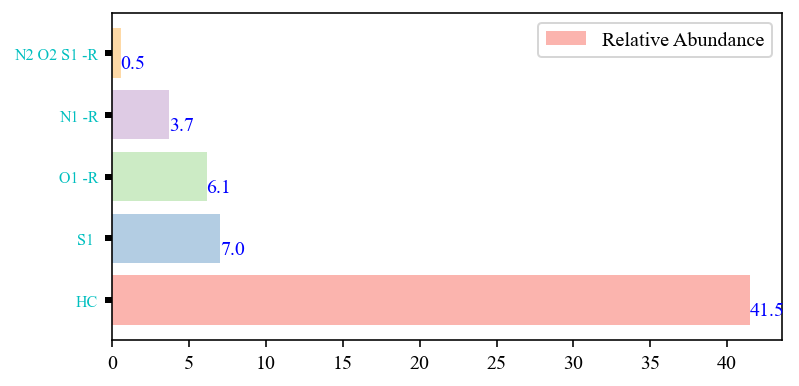

In [94]:
plt.figure(figsize=(6, 3), dpi=144)
colors1 = plt.cm.Pastel1(range(10)) # Dark2, Pastel1, Paired, Accent, Pastel2, Set1, Set2, Set3, tab10, tab20, tab10b
y = anmss.index
largo = anmss['R. Abundance']
plt.barh(y=y, width=largo, height=0.8, color=colors1, label='Relative Abundance')
plt.tick_params(axis='y', labelsize=8, labelcolor='c', width=3)
#ax[1].xaxis.set_minor_locator(MultipleLocator(5))
plt.legend(loc='best', fontsize=10)

for i, (valor, nombre) in enumerate(zip(largo, y)):
    #ax[1].text(valor, i, nombre, ha='left', size=10, color="red")
    plt.text(valor, i-.25, round(valor, 1), ha='left', size=10, color="blue")

In [27]:
from bokeh.io import output_notebook, show, output_file, export_png
from bokeh.plotting import figure, show
from bokeh.models import Segment, ColumnDataSource

output_notebook() # Ver la figura en el cuaderno

TOOLS="zoom_in,zoom_out,box_zoom,undo,redo,reset,save,box_select,poly_select,lasso_select,"

# Graficación
p = figure(title='FTIR', plot_width=600, plot_height=400, x_range=(4000, 500), y_range=(30, 100), x_axis_label='Wavenumber (cm-1)', y_axis_label='Intensity (arb. units)', toolbar_location="above", tools=TOOLS)
p.grid.grid_line_alpha=0.3
p.line(ir1[:,0], ir1[:,1], color='red', line_width=2, legend_label='PLA', alpha=0.9)
p.line(ir2[:,0], ir2[:,1]-20, color='blue', line_width=2, legend_label='PLA-Grafeno', alpha=0.5)

#ax.plot(ir3[:,0], ir3[:,1]-40, 'b', label='FTIR-FC', lw=2)

p.legend.location = "bottom_right"
p.grid.visible = True
p.title.align = "center"
p.title.text_font_size = "20px"

show(p)

Loading BokehJS ...

In [18]:
data_bar2= pd.read_excel('https://github.com/emejiao/Mass_Spectra3/blob/master/V_all_molecules.xlsx?raw=true', usecols='B,C, D')
data_bar2.head(10)

,MF,DBE,Rel. Abudance
0,C18H23,9,2.502718
1,C18H25,8,1.781002
2,C19H17,13,1.721272
3,C18H29,6,2.618670
4,C19H21,11,4.065961
5,C18H33,4,3.672183
6,C19H23,10,3.373678
7,C19H25,9,5.199126
8,C19H27,8,7.436987
9,C19H29,7,4.584406


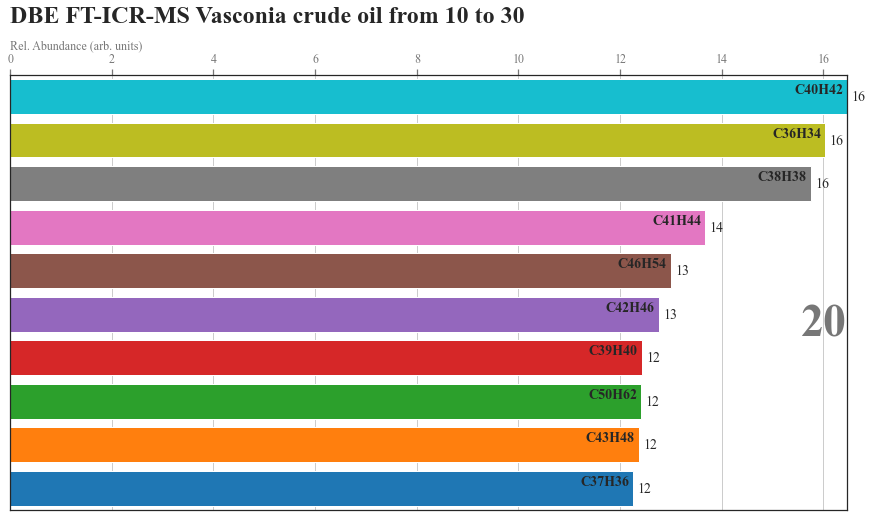

In [22]:
fig, ax = plt.subplots(figsize=(15, 8))
colors = plt.cm.tab10(range(20)) #Dark2, Pastel1, Paired, Accent, Pastel2, Set1, Set2, Set3, tab10, tab20, tab10b
def Barras(dbe):
    dff = data_bar2[data_bar2['DBE'].eq(dbe)].sort_values(by='Rel. Abudance', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['MF'], dff['Rel. Abudance'], color=colors)
    dx = dff['Rel. Abudance'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Rel. Abudance'], dff['MF'])):
        ax.text(value-dx, i, name, size=14, weight=600, ha='right', va='bottom')
        #ax.text(value-dx, i-.25, name, size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i, f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, dbe, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Rel. Abundance (arb. units)', transform=ax.transAxes, size=12, color='#777777')
    #ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'DBE FT-ICR-MS Vasconia crude oil from 10 to 30',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(True)
    
Barras(20)

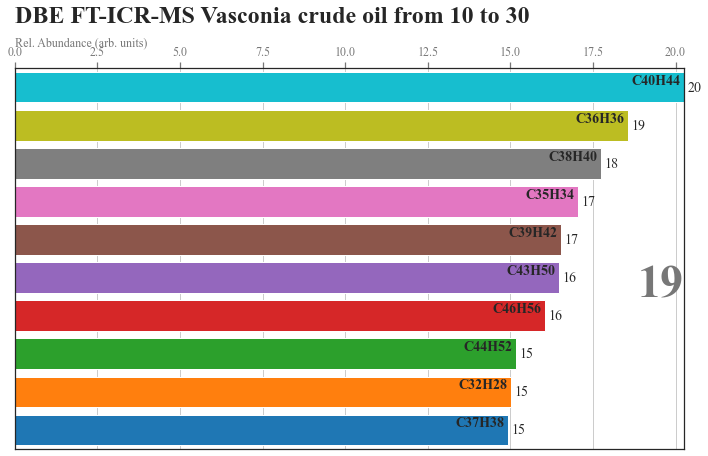

In [26]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax= plt.subplots(figsize=(12, 7))
animator = animation.FuncAnimation(fig, Barras, frames=range(5, 20))
HTML(animator.to_jshtml()) 

**<font color=green size=5>Visualización de Contornos** 

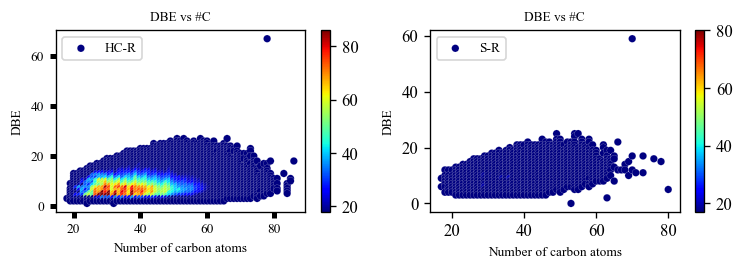

In [9]:
import matplotlib.pyplot as plt
HCR1 = pd.read_excel('https://github.com/emejiao/Mass_Spectra3/blob/master/HCR.xlsx?raw=true', skiprows=0)
HCR = HCR1.values
SR1 = pd.read_excel('https://github.com/emejiao/Mass_Spectra3/blob/master/SR.xlsx?raw=true',  skiprows=0)
SR = SR1.values

# 2-d tests - setup scattered data
x = HCR[:,1]#np.random.rand(100)*4.0-2.0
y = HCR[:,2]#np.random.rand(100)*4.0-2.0
z = HCR[:,3]#x*np.exp(-x**2-y**2)
edges = np.linspace(min(HCR[:,1]),max(HCR[:,1]), 101)
centers = edges[:-1] + np.diff(edges[:2])[0] / 2.
XI, YI = np.meshgrid(centers, centers)

plt.subplots(1, 2, figsize=(4, 2), dpi= 120, gridspec_kw=None)
plt.rcParams["font.family"] = 'Times New Roman'
plt.subplots_adjust(hspace=2, left=0.07, right=1.5)
# plot the result
plt.subplot(1, 2, 1)
X_edges, Y_edges = np.meshgrid(edges, edges)
lims = dict(cmap='jet', vmin=min(HCR[:,1]), vmax=max(HCR[:,1]))
plt.tick_params(labelsize=8, labelcolor='k', width=3)
plt.scatter(x, y, 20, z, edgecolor='w', lw=0.1, label = 'HC-R', **lims)
plt.legend(loc='best', fontsize = 8)
plt.title('DBE vs #C', fontsize = 8)
plt.xlabel('Number of carbon atoms', fontsize = 8)
plt.ylabel('DBE', fontsize = 8)
#plt.xlim(-2, 2)
#plt.ylim(-2, 2)
plt.colorbar()

plt.subplot(1, 2, 2)
x = SR[:,1]#np.random.rand(100)*4.0-2.0
y = SR[:,2]#np.random.rand(100)*4.0-2.0
z = SR[:,3]#x*np.exp(-x**2-y**2)
edges = np.linspace(min(SR[:,1]),max(SR[:,1]), 80)
centers = edges[:-1] + np.diff(edges[:2])[0]/4
XI, YI = np.meshgrid(centers, centers)
X_edges, Y_edges = np.meshgrid(edges, edges)
lims = dict(cmap='jet', vmin=min(SR[:,1]), vmax=max(SR[:,1]))
#plt.pcolormesh(X_edges, Y_edges, ZI, shading='flat', **lims)
plt.scatter(x, y, 20, z, edgecolor='w', lw=0.1, label = 'S-R', **lims)
plt.legend(loc='best', fontsize = 8)
plt.title('DBE vs #C', fontsize = 8)
plt.xlabel('Number of carbon atoms', fontsize = 8)
plt.ylabel('DBE', fontsize = 8)
#plt.xlim(-2, 2)
#plt.ylim(10, 50)
plt.colorbar(ticks=None)

Text(0, 0.5, '')

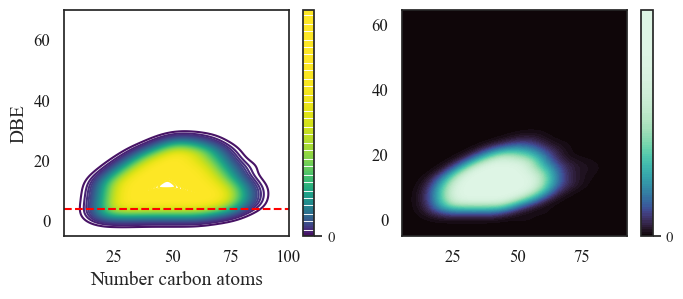

In [10]:
import seaborn as sns
sns.set_theme(style="white")
f = plt.figure(figsize=(8, 3), dpi = 100)
gs = f.add_gridspec(1, 2)
SR1=SR1[SR1[1]<60]
#HCR1=HCR1[HCR1[1]<40]
plt.rcParams["font.family"] = 'Times New Roman'

sns.kdeplot(data=HCR1, x=HCR1[0], y=HCR1[1],
            fill=False, clip=((2, 100), (-5, 70)), ax = f.add_subplot(gs[0, 0]),
            thresh=0, levels=100, cmap="viridis",
            cbar_kws={'ticks': [0, 100]}, cbar=True)
plt.tick_params(axis='both', labelsize=12, labelcolor='k', width=3)
plt.xlabel('Number carbon atoms', fontsize=14)
plt.ylabel('DBE', fontsize=14)
plt.axhline(np.array(HCR1[1])[np.where(HCR1[2]==np.max(HCR1[2]))], color = 'red', linestyle='--', label='Average')

sns.kdeplot(data=SR1, x=SR1[0], y=SR1[1], shade=None,
            fill=True, clip=((5, 800), (-5, 70)), ax = f.add_subplot(gs[0, 1]),
            thresh=0, levels=100, cmap="mako",
            cbar_kws={'ticks': [0, 80]}, cbar=True)
plt.tick_params(axis='both', labelsize=12, labelcolor='k', width=3)
plt.xlabel('')
plt.ylabel('')